In [75]:
#importing all the package dependencies required
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
#Setting the style for all our graphs withtin this script
matplotlib.style.use('ggplot')

#Magical expression to create graphs
%matplotlib inline

#Reading in the csv with all our time_stamps
iplocation = pd.read_csv("iplocation.csv")
#Inputting the csv into a data frame
df = pd.DataFrame(iplocation)
#naming the columns within the data frame
df.columns = ['time_stamp', 'ip', 'country', 'city']

In [76]:
#Create a new data frame which just contains the time_stamp column
time_stamp_df = df[['time_stamp']]
#test the data frame
time_stamp_df.head()

,time_stamp
0,2016-05-01 11:49:40
1,2016-05-01 15:32:13
2,2016-05-01 15:32:14
3,2016-05-01 15:32:13
4,2016-05-01 19:55:59


In [77]:
#Depending on the values (e.g. object, string or int) it will display some basic statistics
#Since this is an object value it will display; count, unique, most common, and frequency of the most common
time_stamp_df['time_stamp'].describe()

count                    5736
unique                   3925
top       2016-03-15 20:20:13
freq                       82
Name: time_stamp, dtype: object

In [78]:
#List the data types in each column
time_stamp_df.dtypes

time_stamp    object
dtype: object

In [79]:
#This piece of code converts the time_stamp column of the data frame from object to datetime argument 
#This will allow us to seperate the year, month, hour, minute and second to seperate columns
time_stamp_df['time_stamp'] = pd.to_datetime(time_stamp_df['time_stamp'])
time_stamp_df.head()

C:\Users\Adam\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


,time_stamp
0,2016-05-01 11:49:40
1,2016-05-01 15:32:13
2,2016-05-01 15:32:14
3,2016-05-01 15:32:13
4,2016-05-01 19:55:59


In [80]:
#Test that the time_stamp values aren't being read as a string and instead as a datetime value
time_stamp_df.dtypes

time_stamp    datetime64[ns]
dtype: object

In [81]:
#To replace the days of the week from 0 - 6 to something more readable such as Monday - Sunday we mapped the day of the we
#values to the following
dayOfWeek={0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'}
#We also did the same for the months of the year as 0 - 11 wouldn't look as attractive in our columns
monthOfYear={1:'January', 2:'February', 3:'March', 4:'April', 5:'May', 6:'June', 7:'July', 8:'August', 9:'September', 10:'October', 
             11:'November', 12:'December'}
#Next we had to take our timestamp value and add a column for each year, month, day, time, hour, minute and second value.
#To do this we have to convert the value within our time_stamp column from a string to a datetime object, which we did previously
#To create a new column and grab just the year value from the time_stamp column we do the following
time_stamp_df['year'] = time_stamp_df['time_stamp'].dt.year
#The .dt accessor basically reads in our time_stamp column value, and using the .month or .year argument we can just grab said argument
time_stamp_df['month'] = time_stamp_df['time_stamp'].dt.month.map(monthOfYear)
#We add the .map to make sure that we aren't just getting the numerical values from .day and .month as listed above
time_stamp_df['day'] = time_stamp_df['time_stamp'].dt.dayofweek.map(dayOfWeek)
time_stamp_df['time'] = time_stamp_df['time_stamp'].dt.time
time_stamp_df['hour'] = time_stamp_df['time_stamp'].dt.hour
time_stamp_df['minute'] = time_stamp_df['time_stamp'].dt.minute
time_stamp_df['seconds'] = time_stamp_df['time_stamp'].dt.second
#Display the newly formatted data frame
time_stamp_df.head()

C:\Users\Adam\Anaconda2\lib\site-packages\ipykernel\__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Adam\Anaconda2\lib\site-packages\ipykernel\__main__.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,time_stamp,year,month,day,time,hour,minute,seconds
0,2016-05-01 11:49:40,2016,May,Sunday,11:49:40,11,49,40
1,2016-05-01 15:32:13,2016,May,Sunday,15:32:13,15,32,13
2,2016-05-01 15:32:14,2016,May,Sunday,15:32:14,15,32,14
3,2016-05-01 15:32:13,2016,May,Sunday,15:32:13,15,32,13
4,2016-05-01 19:55:59,2016,May,Sunday,19:55:59,19,55,59


In [82]:
#Depending on the values (e.g. object, string or int) it will display some basic statistics
#Since this is an object value it will display; count, unique, most common, and frequency of the most common
time_stamp_df['day'].describe()

count       5736
unique         7
top       Sunday
freq        1951
Name: day, dtype: object

In [83]:
#Create a new data frame where it's grouped by the days and has the total amount of hits generated by the count of all 
#the days in our previous data frame time_stamp_df
total_days = pd.DataFrame(time_stamp_df.day.value_counts())
total_days.columns = ['hits']
total_days

,hits
Sunday,1951
Thursday,1324
Tuesday,1183
Friday,936
Wednesday,161
Monday,114
Saturday,67


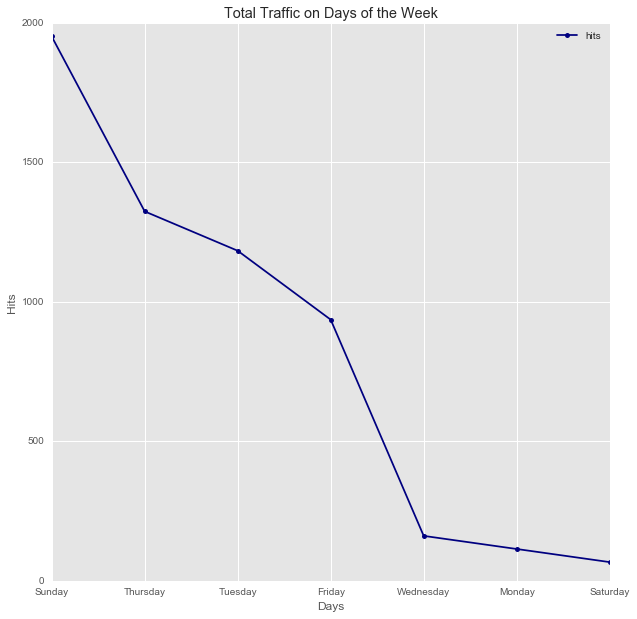

In [84]:
#Display graph from the total_days data frame
graph = total_days.plot(colormap='jet',figsize=(10,10), markersize=10,marker='.',title='Total Traffic on Days of the Week')
graph.set_xlabel("Days")
graph.set_ylabel("Hits")
#Save the graph to .png image
plt.savefig('total_days',bbox_inches='tight')
graph

In [85]:
#Create a new data frame where it's grouped by the months of the year and has the total amount of hits generated by the count of all 
#the months in our previous data frame time_stamp_df
total_months = pd.DataFrame(time_stamp_df.month.value_counts())
total_months.columns = ['hits']
total_months

,hits
March,4570
April,1102
May,64


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000000000C42B358>], dtype=object)

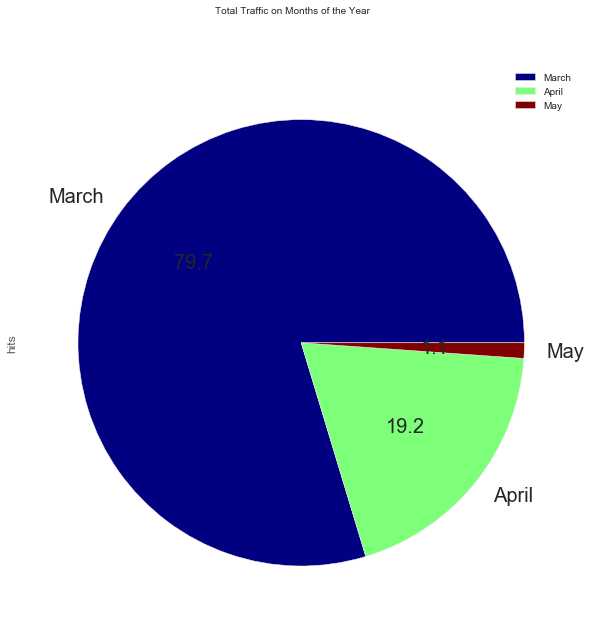

In [86]:
#Display graph from the total_months data frame
graph = total_months.plot.pie(colormap='jet',figsize=(10,10),title='Total Traffic on Months of the Year', autopct='%.1f', fontsize=20, 
                              subplots='True')
#Save the graph to .png image
plt.savefig('total_months.png',bbox_inches='tight')
graph

In [87]:
#Create a new data frame from time_stamp and create an index with the list of hours found in time_stamp data frame
hours = time_stamp_df.groupby('hour')
#Get the entire size of each value of hours from the data frame hours
total_hour = hours.size()
#Create a new data frame from the results of total_hour
df_hours = pd.DataFrame(total_hour)
#Name the column with the total value of hits per hour
df_hours.columns = ['total']
#Test the data frame
df_hours.head()

,total
hour,
0,51
1,105
2,53
3,44
4,55


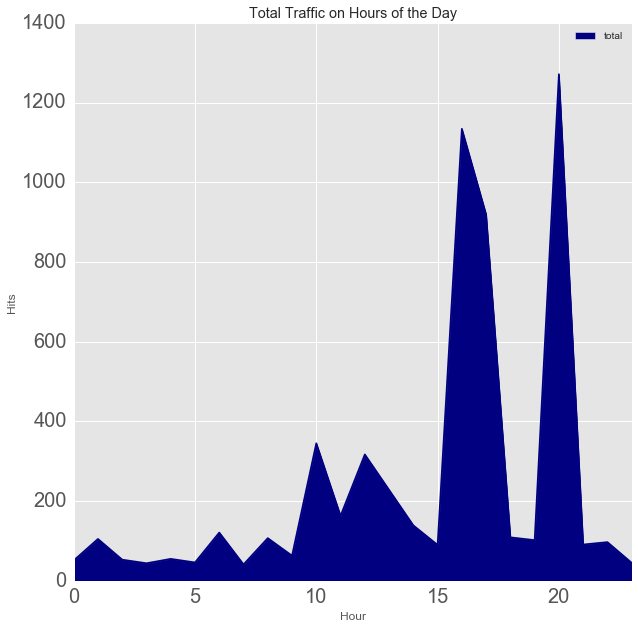

In [88]:
#Display graph from the df_hours data frame 
graph = df_hours.plot.area(colormap='jet',figsize=(10,10),title='Total Traffic on Hours of the Day', fontsize=20)
graph.set_xlabel("Hour")
graph.set_ylabel("Hits")
#Save the graph to .png image
plt.savefig('df_hours.png',bbox_inches='tight')
graph

In [89]:
#Create a new data frame from time_stamp and create an index with the list of minutes found in time_stamp data frame
minutes = time_stamp_df.groupby('minute')
#Get the entire size of each value of minutes from the data frame minutes
total_minutes = minutes.size()
#Create a new data frame from the results of df_minutes 
df_minutes = pd.DataFrame(total_minutes)
#Name the column with the total value of hits per minutes
df_minutes.columns = ['total']
#Test the data frame
df_minutes.head()

,total
minute,
0,92
1,90
2,88
3,91
4,96


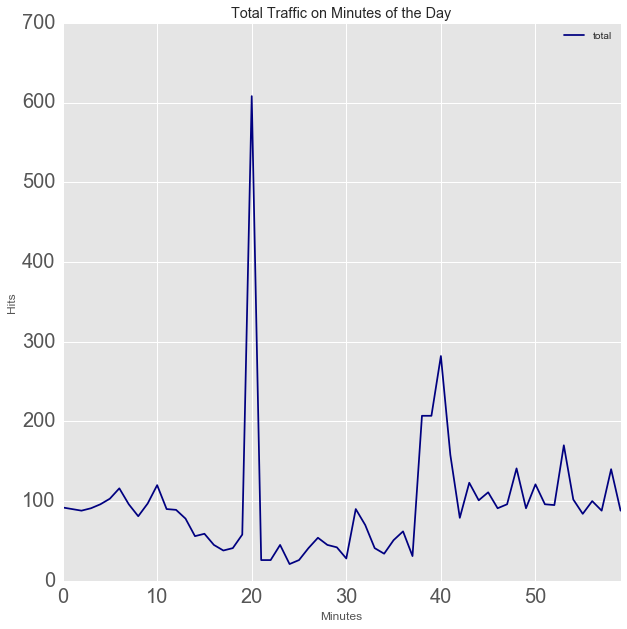

In [90]:
#Display graph from the df_minutes data frame
graph = df_minutes.plot(colormap='jet',figsize=(10,10),title='Total Traffic on Minutes of the Day', fontsize=20)
graph.set_xlabel("Minutes")
graph.set_ylabel("Hits")
#Save the graph to .png image
plt.savefig('df_minutes.png',bbox_inches='tight')
graph

In [91]:
#Create a data frame with the total amount of months in the time_stamp_df data frame
time_df = pd.DataFrame(time_stamp_df.month.value_counts())
#Set the column to the year
time_df.columns=['2016'] 
#Test data frame
time_df

,2016
March,4570
April,1102
May,64


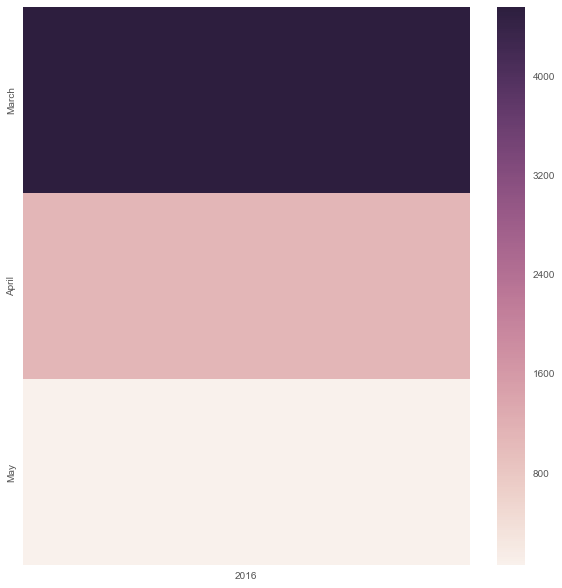

In [92]:
#Set the size of the data frame to the following dimensions
size = (10, 10)
#Implement the figure size
fig, ax = plt.subplots(figsize=size)
#Display graph using the time_df data frame
sns.heatmap(data=time_df)
#Save the graph to .png image
plt.savefig('time_df.png',bbox_inches='tight')